## PROJET 2 : PREVISION DU PRIX DE L'OR

### OBJECTIF : PREDIRE AVEC PRECISION LE FUTUR COURS DE CLOTURE AJUSTE DE L'ETF SUR L'OR SUR UNE PERIODE DANS LE FUTUR.

## ETAPE A SUIVRE :
### 1. Faire l’analyse exploratoire du Dataset
### a. Identification de la target 
### b. Nombre des lignes et de colonnes 
### c. Identification des valeurs manquantes 
### d. Types de variables 
### e. Visualisation de la cible (target)
### f. Compréhension des différentes variables 
### g. Visualisation des relations : features/target 
### h. Identification des outliers
## 2. Prédire le prix de l’or
### a. Pre-processing
 ### b. Modélisation

## Importation des différentes librairies

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')

## Chargement du jeu de données

In [15]:
data = pd.read_csv("FINAL_USO.csv", parse_dates=[0], index_col='Date')

In [16]:
df = data.copy()
df

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700


In [17]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

## ANALYSE EXPLORATOIRE DU DATASET

## a) Identification de la target

La variable à prédire est la variable Adj Close, c'est à dire le prix d'une action à la cloture du jour de la bourse.

In [18]:
df['Adj Close'].describe()

count    1718.000000
mean      127.319482
std        17.536269
min       100.500000
25%       116.052502
50%       121.795002
75%       128.470001
max       173.610001
Name: Adj Close, dtype: float64

### b) Nombre de lignes et de colonnes

In [19]:
df.shape

(1718, 80)

Notre jeu de données est composé de 1718 lignes et 80 colonnes.

### c) Identification des valeurs manquantes

In [20]:
dict_val_mqtes = {i : df[i].isna().sum() for i in df.columns}

In [21]:
dict_val_mqtes

{'Open': 0,
 'High': 0,
 'Low': 0,
 'Close': 0,
 'Adj Close': 0,
 'Volume': 0,
 'SP_open': 0,
 'SP_high': 0,
 'SP_low': 0,
 'SP_close': 0,
 'SP_Ajclose': 0,
 'SP_volume': 0,
 'DJ_open': 0,
 'DJ_high': 0,
 'DJ_low': 0,
 'DJ_close': 0,
 'DJ_Ajclose': 0,
 'DJ_volume': 0,
 'EG_open': 0,
 'EG_high': 0,
 'EG_low': 0,
 'EG_close': 0,
 'EG_Ajclose': 0,
 'EG_volume': 0,
 'EU_Price': 0,
 'EU_open': 0,
 'EU_high': 0,
 'EU_low': 0,
 'EU_Trend': 0,
 'OF_Price': 0,
 'OF_Open': 0,
 'OF_High': 0,
 'OF_Low': 0,
 'OF_Volume': 0,
 'OF_Trend': 0,
 'OS_Price': 0,
 'OS_Open': 0,
 'OS_High': 0,
 'OS_Low': 0,
 'OS_Trend': 0,
 'SF_Price': 0,
 'SF_Open': 0,
 'SF_High': 0,
 'SF_Low': 0,
 'SF_Volume': 0,
 'SF_Trend': 0,
 'USB_Price': 0,
 'USB_Open': 0,
 'USB_High': 0,
 'USB_Low': 0,
 'USB_Trend': 0,
 'PLT_Price': 0,
 'PLT_Open': 0,
 'PLT_High': 0,
 'PLT_Low': 0,
 'PLT_Trend': 0,
 'PLD_Price': 0,
 'PLD_Open': 0,
 'PLD_High': 0,
 'PLD_Low': 0,
 'PLD_Trend': 0,
 'RHO_PRICE': 0,
 'USDI_Price': 0,
 'USDI_Open': 0,
 'U

Notre jeu de données n'admet pas de valeurs manquantes.

### d) Type de variables

In [22]:
# dict_types_var = {i : df[i].dtypes for i in df.columns}
# dict_types_var

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

On observe 58 variables de type Float et 22 variables de type entier.

### e) Visualisation de la variable cible

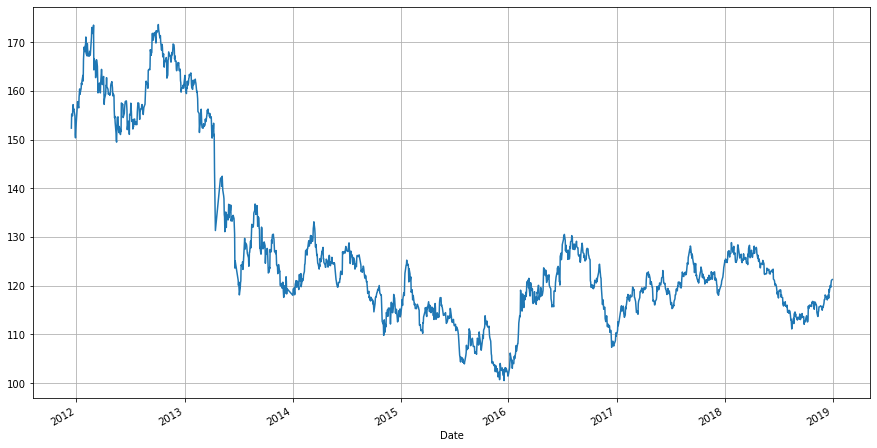

In [27]:
plt.figure(figsize=(15,8))
df['Adj Close'].plot(grid=True)
plt.show()

De 2012 à 2013 : on constate des phénomènes saisonniers suivant un modèle additif. Les plus grands pics supérieurs sont observés à cette période.
De l'année 2013 à 2016 : on observe un trend baissier des valeurs de ce cours. 
Ensuite, de 2016 à 2019 : Des phénomènes saisonniers sont observés, on remarque le cours évolue progressivement vers le haut.

### Desciption des différentes variables

### Variables explicatives

## <ul>
<li><strong>Un ETF (Exchange Traded Fund) ou Font négocier en bourse (FNB)</strong> est un panier de titres qui se négocient sur une bourse comme le fait une action.</li> 
<li>Les cours des actions des FNB fluctuent (se négocient) toute la journée à mesure que le FNB est acheté et vendu; </li>
<li>Les FNB peuvent contenir tous les types d’investissements, y compris des actions, des matières premières ou des obligations; certains offrent des avoirs uniquement américains, tandis que d’autres sont internationaux.</li>
 <li>Un exemple bien connu est le SPDR S&P 500 ETF(SPY),qui suit l’indice S&P 500. </li>  
</ul>

## <ul>
<li><strong>Gold ETF : </strong><strong>-Open, High, Low, Close et Volume</strong> :</li>
    
<li><strong>Indice S&P 500 : </strong><strong>- 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume' </strong>: </li>
    Un indice boursier est un indicateur qui va nous donner l'état de santé économique de tout un groupe d'actif.
    L'indice boursier S&P 500 est l'indice de référence en Amérique. Il se compose de 500 grandes entreprises cotées sur les bourses américaines.
<li><strong>Indice Dow Jones : </strong><strong>- 'DJ_open','DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume'</strong> : </li>
    Lindice boursier Dow Jones est composé de 30 grandes entreprises américaines et est le plus vieil indice au monde. Il a été créé en 1884 par Charles Dow et Edwardjones sous le nom de Dow Jones Transportation Average. En 1896, il change de nom et devient le Dow Jones Industrial Average, avec un nombre de valeurs Dow Jones de 12.
    
<li><strong>Eldorado Gold Corporation (EGO) : </strong><strong>- 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume'</strong></li>
  Eldorado Gold est une société canadienne productrice d’or et de métaux de base de niveau intermédiaire qui possède 25 ans d’expérience dans la construction et l’exploitation de mines en Europe, en Asie et dans les Amériques. Elle est basée à Vancouver et inscrite à la Bourse de Toronto et à la Bourse de New York. Eldorado Gold a développée et exploitée des actifs de plusieurs sociétés fusionnées telles que HRC Developments Corporation, Afcan Mining Corporation, Sino Gold Mining,Brazauro Resources, Integra Gold, ainsi que European Goldfields.
<li><strong>Taux de change EURO - USD : </strong><strong>- 'EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend'</strong></li>
    Le taux de chauge EURO - USD est le prix de l'euro par rapport au dollar. On distingue deux types de régimes : régime de change flottant, le taux de change se fixe librement selon l'offre et la demande de monnaies sur les marchés des changes, et le régime de change fixe, la valeur d'une monnaie par rapport à une autre est déterminée par les autorités du pays.
<li><strong>Prix du pétrole :</strong>
   <ul>
<li><strong>Pétrole Brut Brent : </strong><strong>- 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend'</strong></li>
<li><strong>Pétrole Brut WTI USD : </strong>- 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend'</li>
    </ul> 
</li>    
<li><strong>Silver Futures : </strong><strong>- 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend'</strong></li>
<li><strong>Taux des obligations Américains (10 years) : </strong><strong>- 'USB_Price', 'USB_Open', 'USB_High','USB_Low',       'USB_Trend'</strong></li>
       
    
   
<li><strong>Le prix des métaux précieux (platine, palladium, Rhodium) :</strong>
    <ul>
     <li><strong>Prix du platine : </strong><strong>- 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low','PLT_Trend'</strong></li>
     <li><strong>Prix du Palladium : </strong><strong>- 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend'</strong></li>
     <li><strong>Prix du Rhodium : </strong><strong>- 'RHO_PRICE'</strong></li>
    </ul>
</li>    
<li><strong>Indice Dollar US :</strong> <strong>'USDI_Price', 'USDI_Open', 'USDI_High','USDI_Low', 'USDI_Volume', 'USDI_Trend'</strong></li>
<li><strong>Gold Miners ETF : </strong><strong>- 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume'</strong></li>
<li><strong>ETF Pétrolier USO : </strong><strong>- 'USO_Open','USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume'</strong></li>
</ul>    
    

Il existe quatre grands groupes de variables :
### MATIERES PREMIERES : Pétroles, Silver Future, Platine, Palladium, Rhodium.
Les différents attributs sont : Price, Open, High, Low, Volume,Trend.
### Les indices boursiers et les ETF : SP, DJ, EGO, GOLD MINERS ETF, GOLD ETF, ETF Pétrolier USO.
Les différents attributs sont : Open, High, Low,Aj Close, Volume.
### Taux de change EURO-USD : EU_Price, EU_Open, EU_High,EU_Low,EU_Trend.
### Indice Dollar US : USDI_Price, USDI_Open, USDI_High, USDI_Low,USDI_Volume, USDI_Trend.

### Variable cible

 La variable cible est la variable <strong>Adj Close</strong> qui correspond à la cloture ajustée c'est à dire le prix d'une action à la cloture du jour de la bourse en tenant compte des facteurs tels que les dividendes, les fractionnements d'actions et les nouvelles offres.

### g) Visualisation des features

In [120]:
# for colonne in df.columns.drop('Adj Close'):
#     fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=1)
#     sns.lineplot(data=df, x=data.index, y=colonne, ax=ax, legend='brief', label=colonne)
#     sns.lineplot(data=df, x=data.index, y='Adj Close', ax=ax, legend='brief', label="Adj Close")
#     plt.show()

In [30]:
## Observation des différents scores de corrélations
coef_corr=corr["Adj Close"].sort_values(ascending=False)

In [79]:
## Variable positivement correlée
#coef_corr[coef_corr>0]

In [80]:
## Variable négativement correlée
#coef_corr[coef_corr<0]

In [113]:
df2 = data.copy()

In [114]:
normalize = RobustScaler()
df2 = normalize.fit_transform(df2)
df_normal = pd.DataFrame(df2, index=df.index, columns=df.columns)

In [117]:
df_normal

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,2.688923,2.600120,2.507438,2.459030,2.459030,2.927618,-1.232212,-1.247154,-1.238396,-1.253525,...,4.454793,4.251764,4.175865,-0.485849,0.889131,0.876443,0.877247,0.859283,0.859283,-0.171436
2011-12-16,2.653698,2.633593,2.688429,2.692571,2.692571,2.219050,-1.244170,-1.250899,-1.248761,-1.262398,...,4.527746,4.400297,4.326350,-0.611542,0.857826,0.857451,0.863218,0.865364,0.865364,-0.173285
2011-12-19,2.749540,2.672645,2.726446,2.663579,2.663579,1.055949,-1.246711,-1.260336,-1.267838,-1.281949,...,4.370974,4.176012,4.099116,-0.645443,0.866957,0.855293,0.871986,0.862324,0.862324,-0.425092
2011-12-20,2.859310,2.797769,2.909917,2.833501,2.833501,0.344607,-1.244918,-1.233074,-1.262731,-1.227206,...,4.578968,4.446343,4.373001,-0.746555,0.906522,0.905363,0.928540,0.921390,0.921390,-0.297086
2011-12-21,2.872416,2.805739,2.872727,2.847997,2.847997,0.941017,-1.218759,-1.229778,-1.226979,-1.223597,...,4.586729,4.441887,4.368486,-0.831528,0.922609,0.932557,0.941692,0.945277,0.945277,-0.263593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.192095,-0.174138,-0.148760,-0.142944,-0.142944,0.469758,0.501868,0.514979,0.448250,0.433282,...,-0.344587,-0.291868,-0.252112,0.675058,-0.302609,-0.307111,-0.296361,-0.306406,-0.306406,0.266809
2018-12-26,-0.106082,-0.105599,-0.148760,-0.171935,-0.171935,1.420139,0.455979,0.594967,0.440589,0.611347,...,-0.363213,-0.361678,-0.326749,1.136443,-0.313044,-0.289846,-0.298553,-0.279913,-0.279913,1.212469
2018-12-27,-0.110178,-0.113568,-0.101653,-0.098651,-0.098651,0.915637,0.554634,0.626573,0.518702,0.639772,...,-0.336826,-0.309692,-0.271169,0.438986,-0.298261,-0.301500,-0.292416,-0.292074,-0.292074,0.997770


### Analyse par groupe de variables

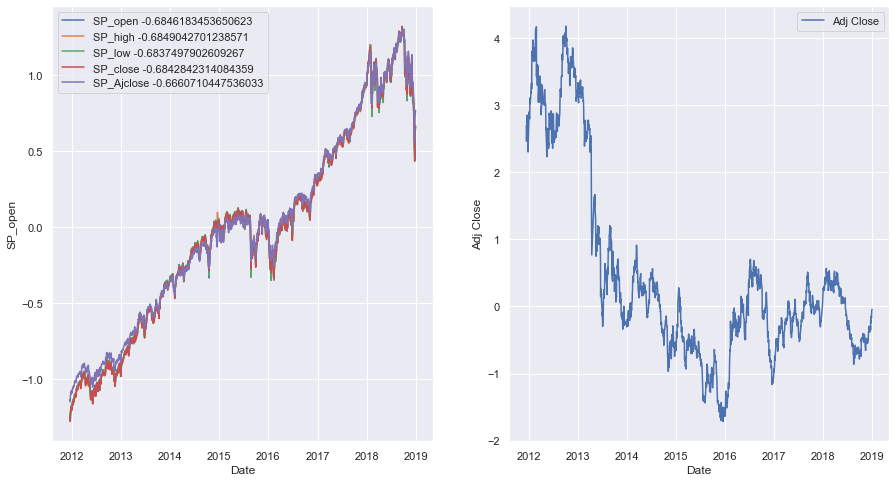

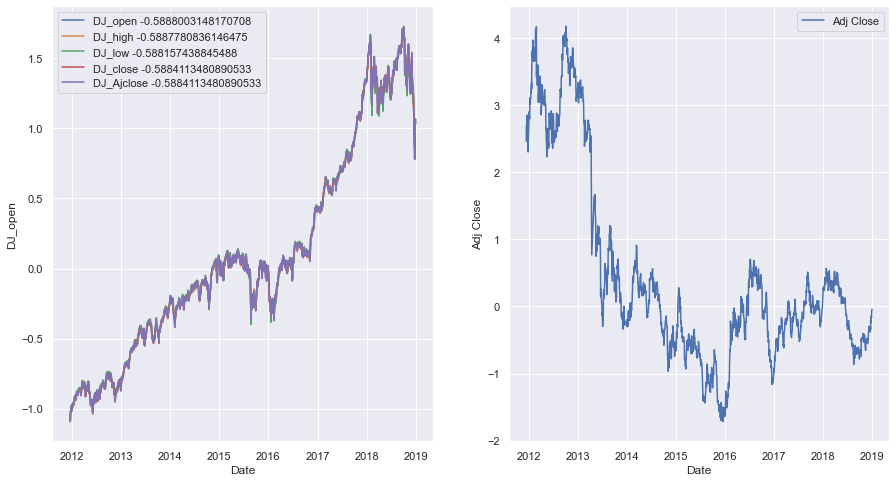

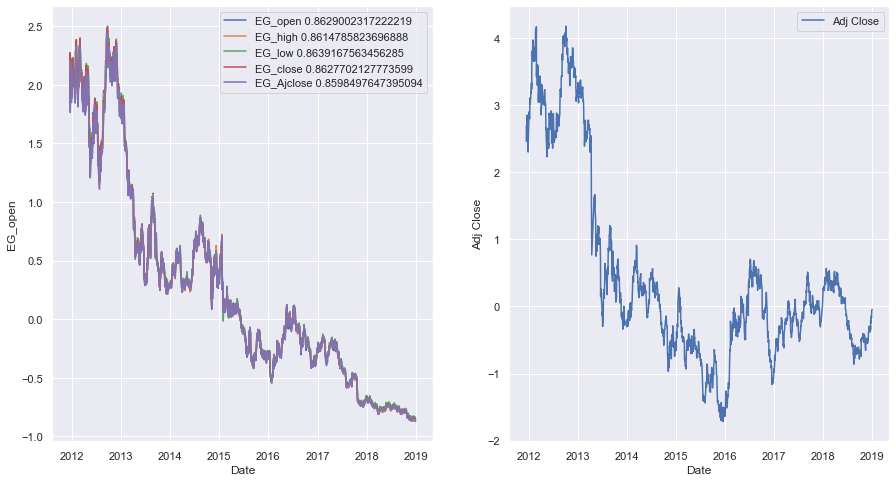

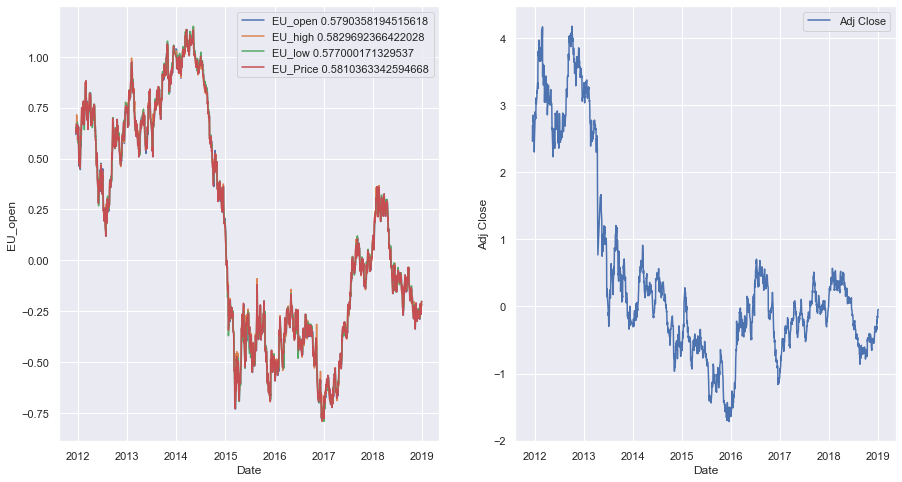

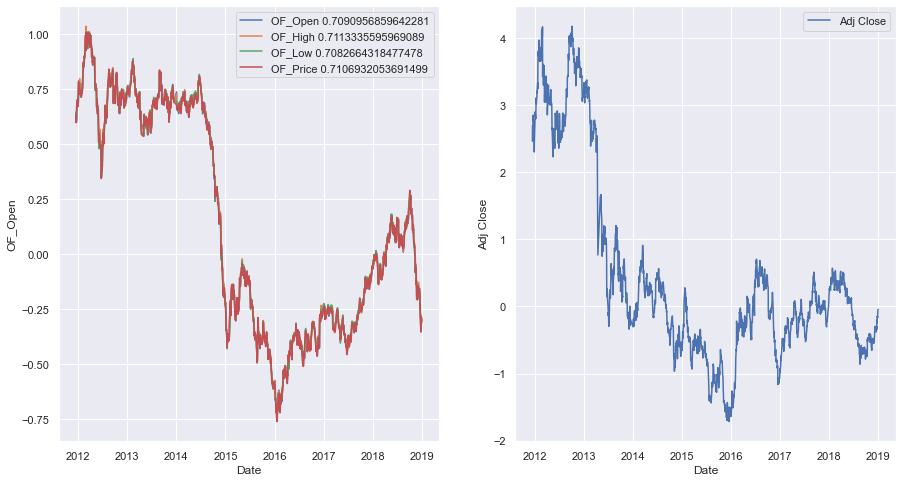

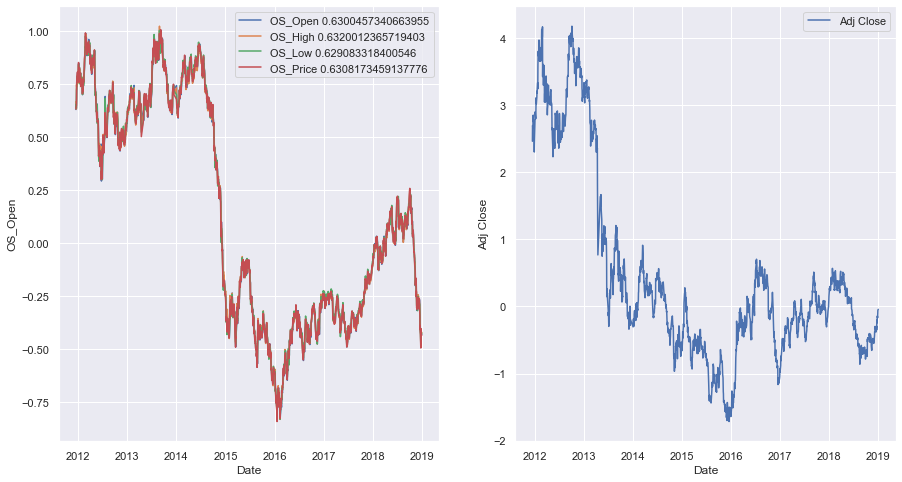

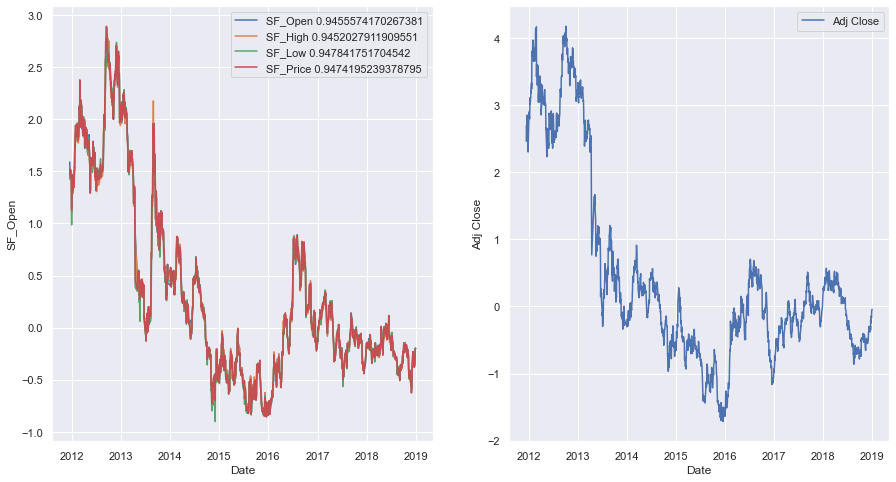

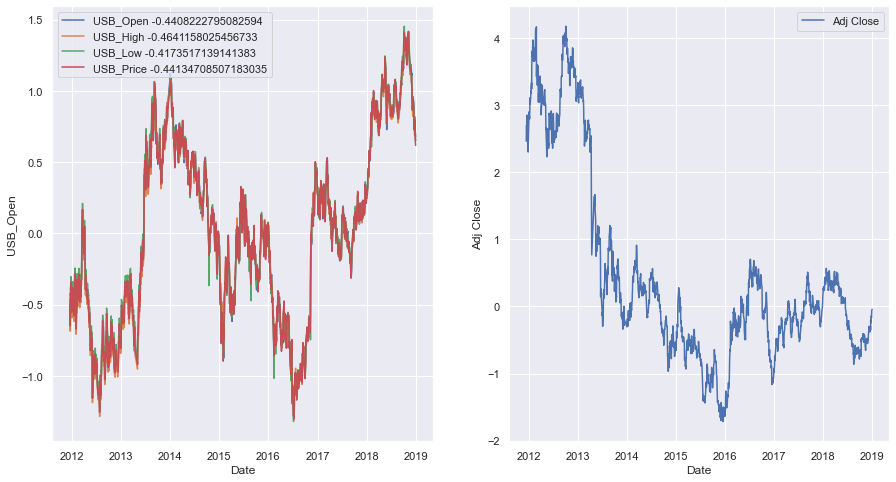

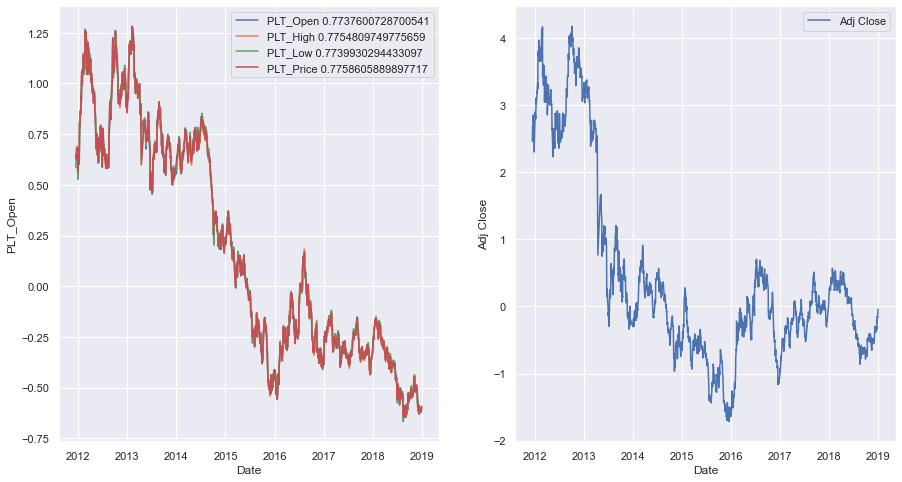

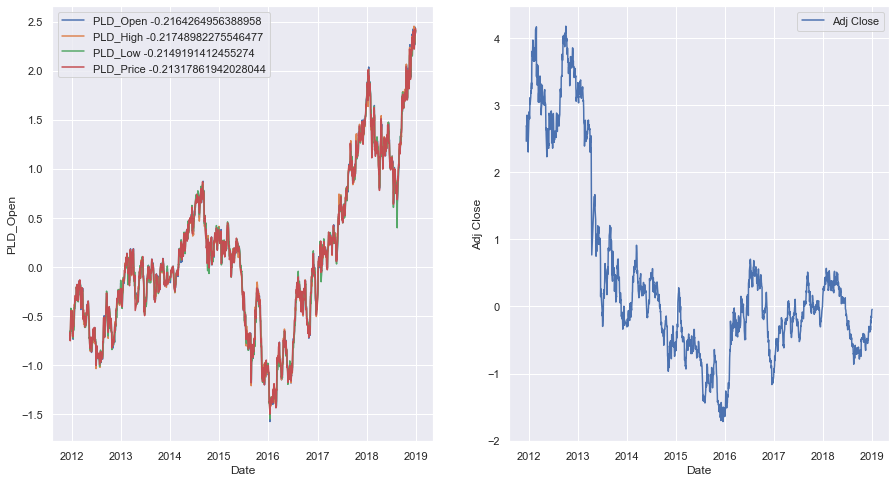

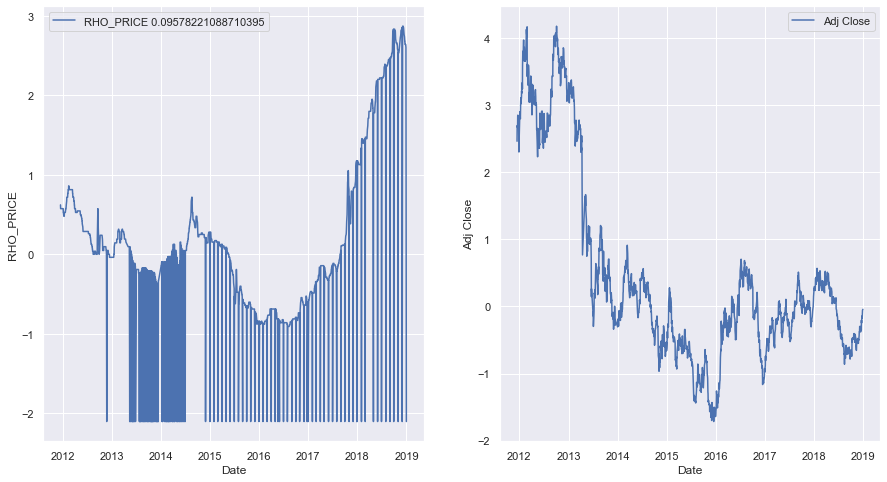

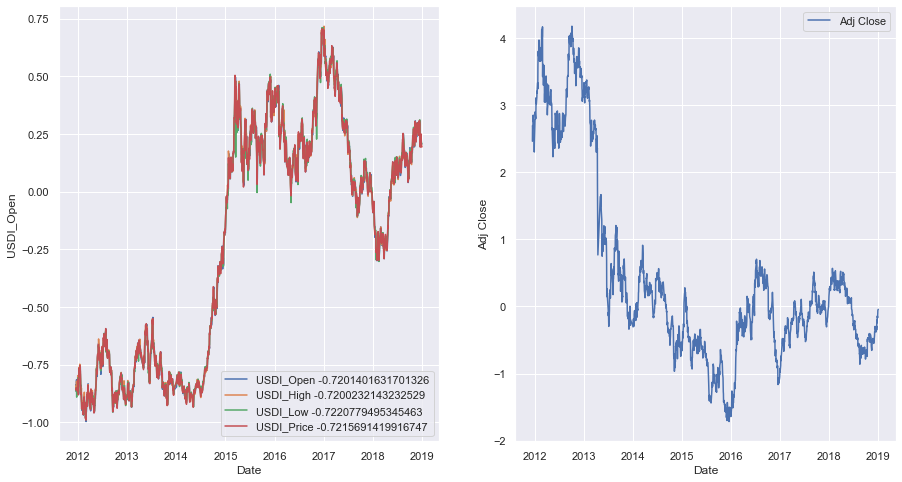

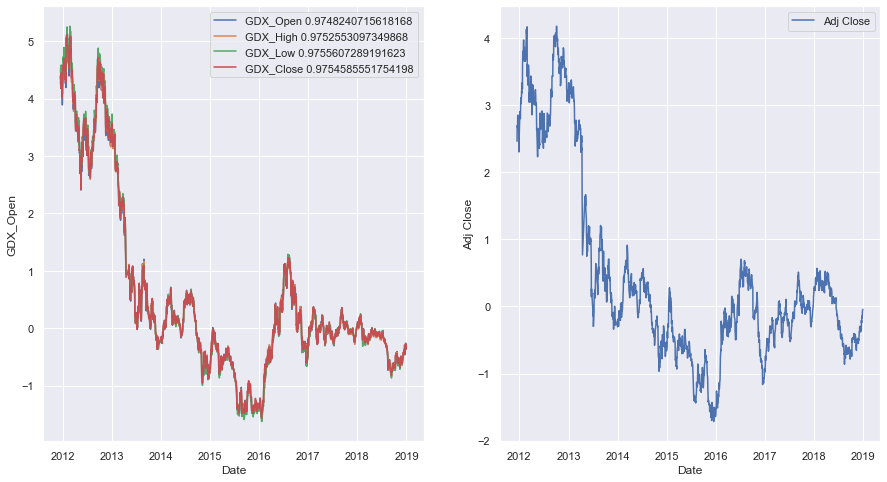

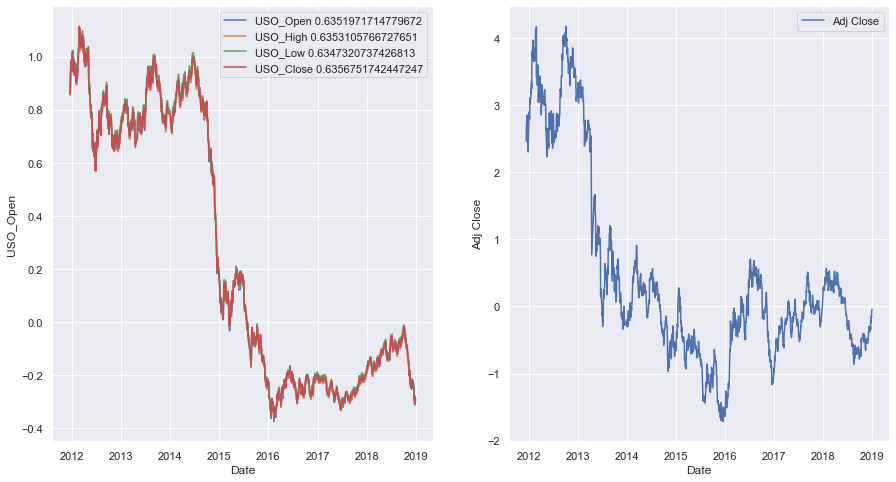

In [118]:
for indicator in ['SP_','DJ_','EG_','EU_','OF_','OS_','SF_','USB_','PLT_','PLD_','RHO_','USDI_','GDX_','USO_']:
    fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=2)
    sns.set(style='darkgrid')
    for value in ['open','high','low','close','Ajclose','price','trend','Open','High','Low','Close','ajclose','Price','PRICE']:
        var = indicator+value
        if var in df.columns.drop('Adj Close'):
            sns.lineplot(data=df_normal, x=data.index, y=var, ax=ax[0], legend='brief', label=var+' {}'.format(coef_corr[var]))
    sns.lineplot(data=df_normal, x=data.index, y='Adj Close', ax=ax[1], legend='brief', label="Adj Close")
    plt.show()
   

### - Lien entre les différents volumes des features et la variable cible

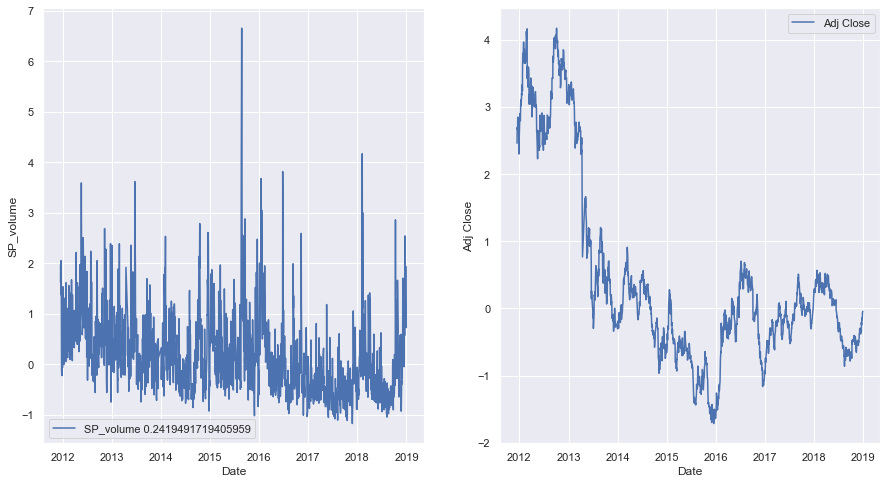

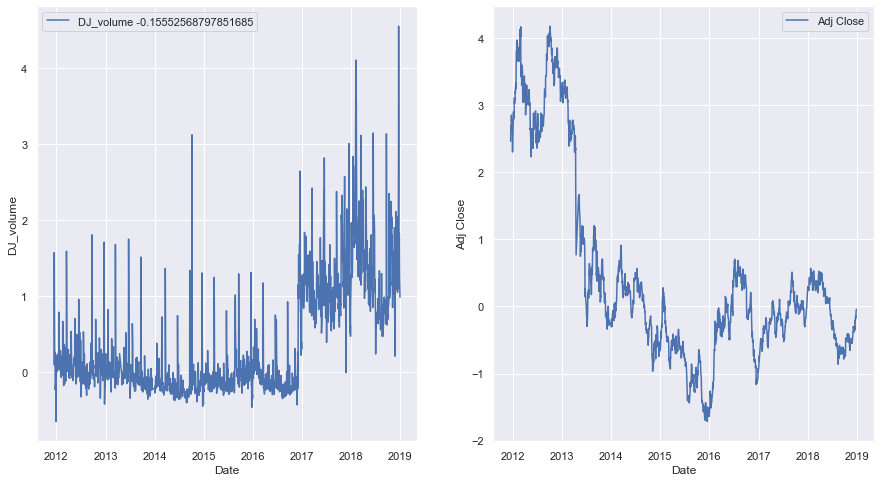

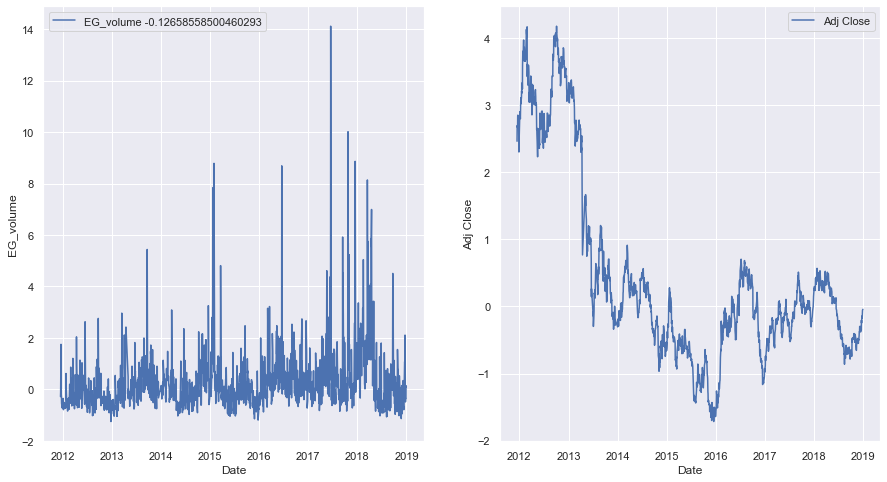

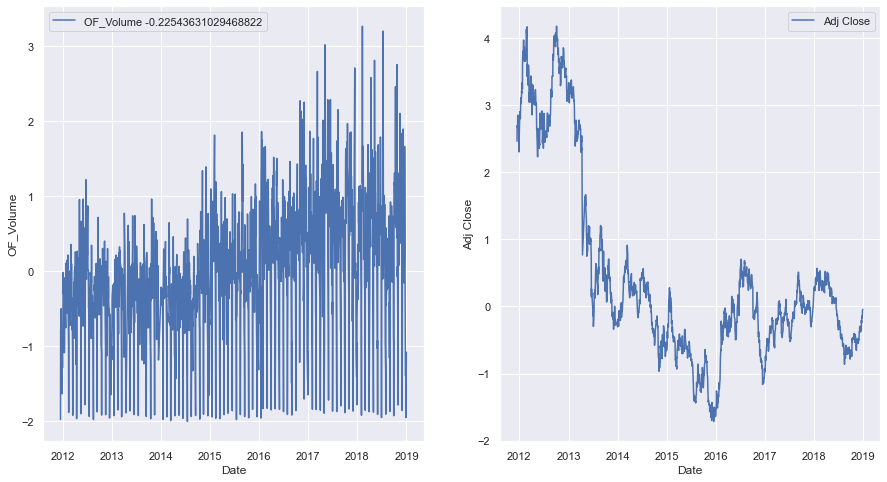

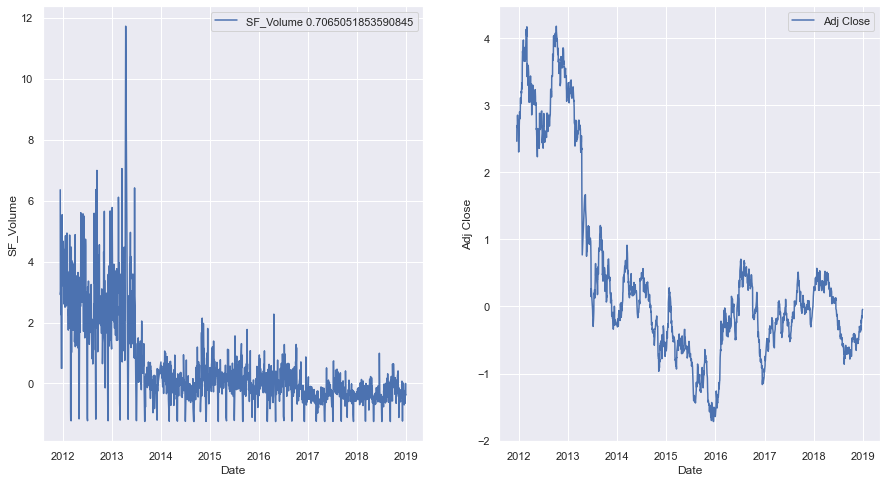

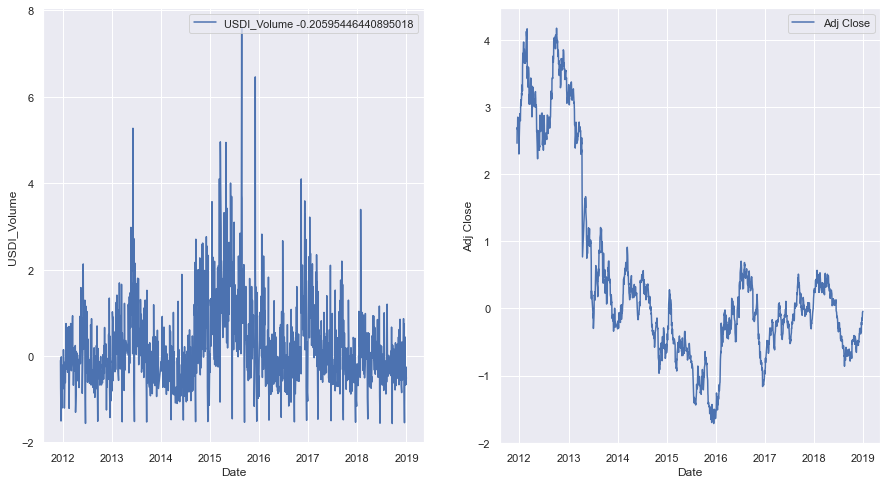

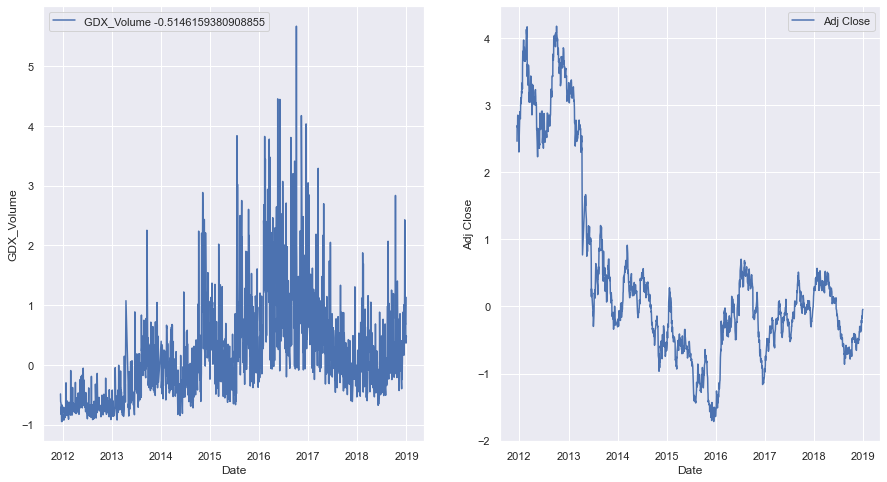

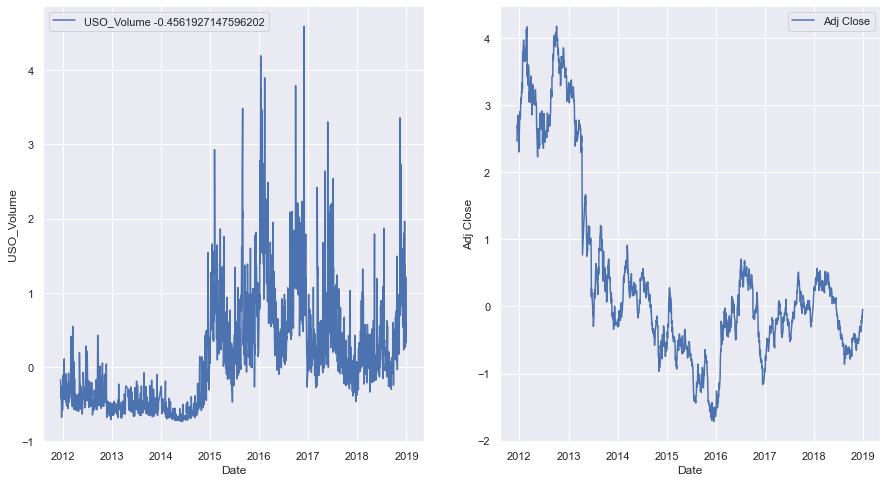

In [119]:
for indicator in ['SP_','DJ_','EG_','OF_','SF_','USDI_','GDX_','USO_']:
    fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=2)
    sns.set(style='darkgrid')
    for value in ['volume', 'Volume','VOLUME']:
        var = indicator+value
        if var in df.columns.drop('Adj Close'):
            sns.lineplot(data=df_normal, x=data.index, y=var, ax=ax[0], legend='brief', label=var+' {}'.format(coef_corr[var]))
    sns.lineplot(data=df_normal, x=data.index, y='Adj Close', ax=ax[1], legend='brief', label="Adj Close")
    plt.show()

### h) Identification des outliers

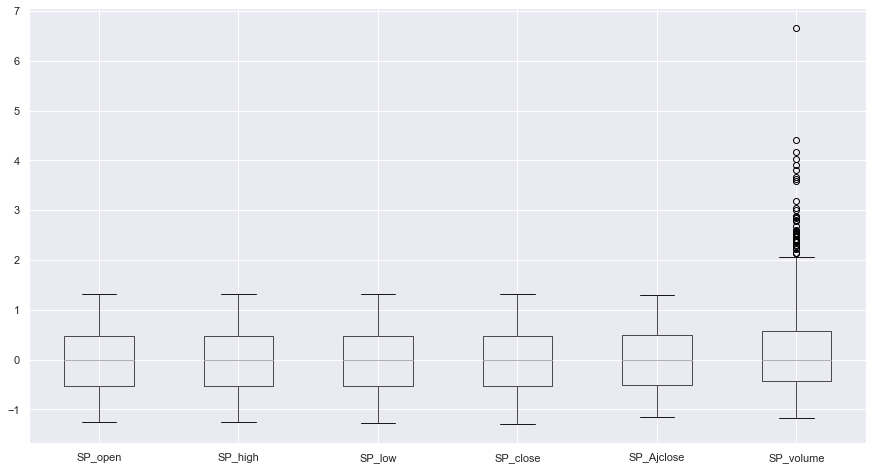

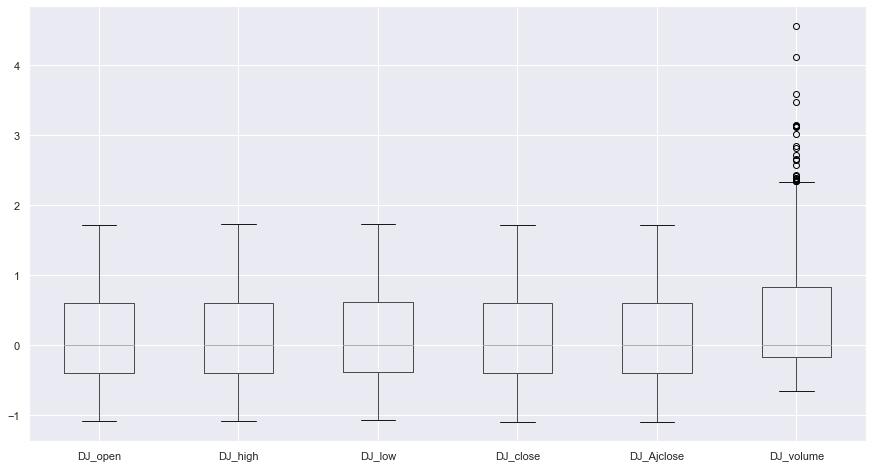

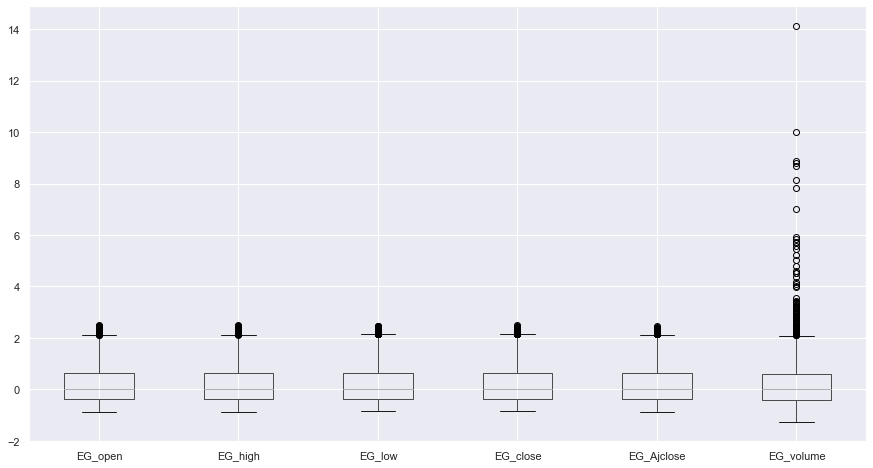

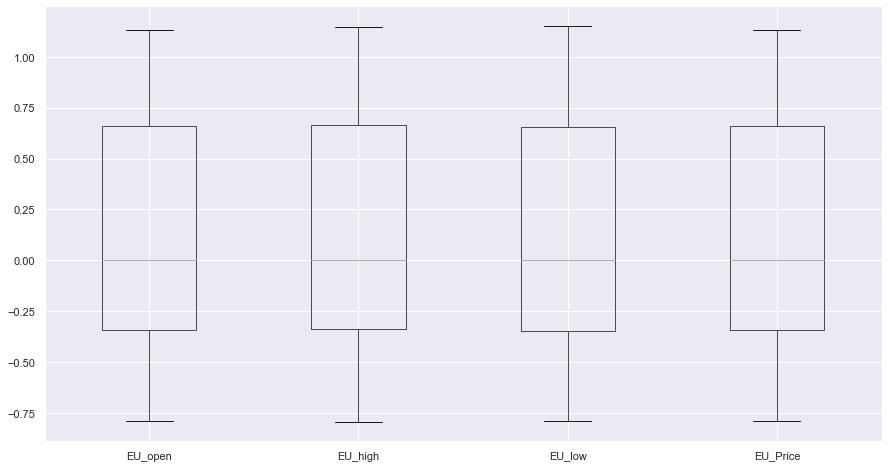

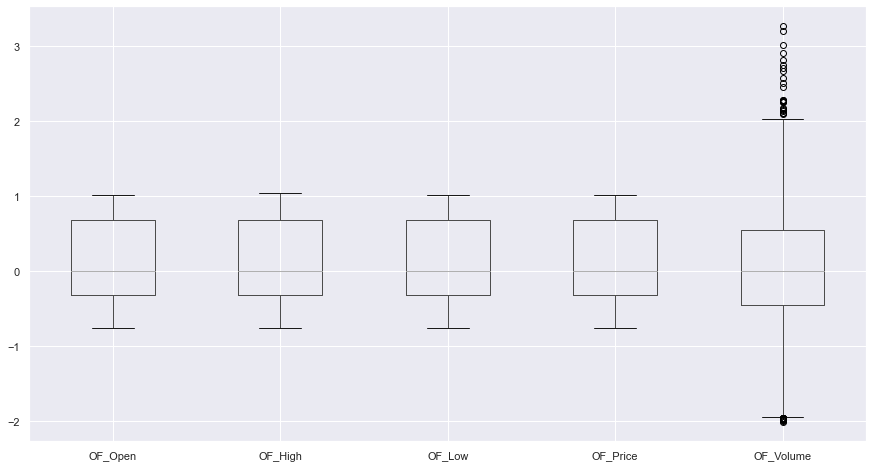

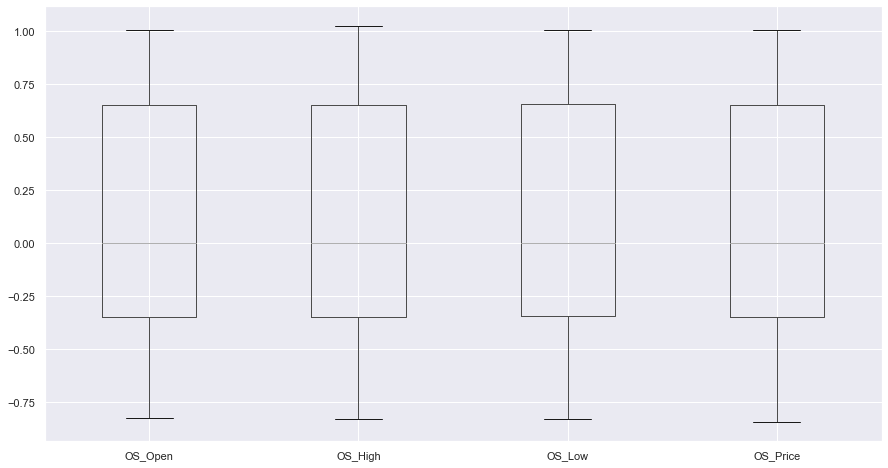

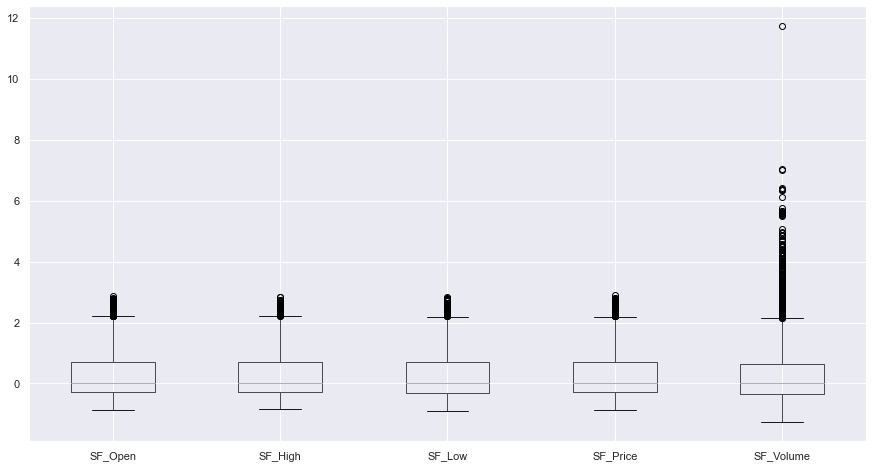

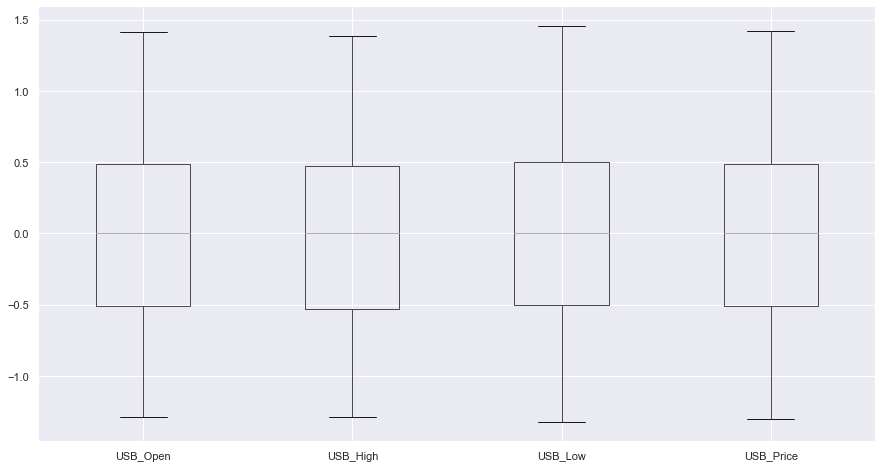

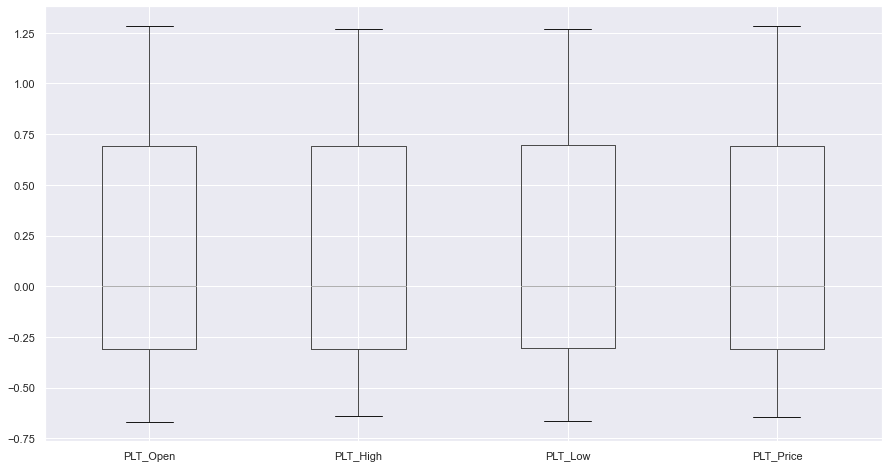

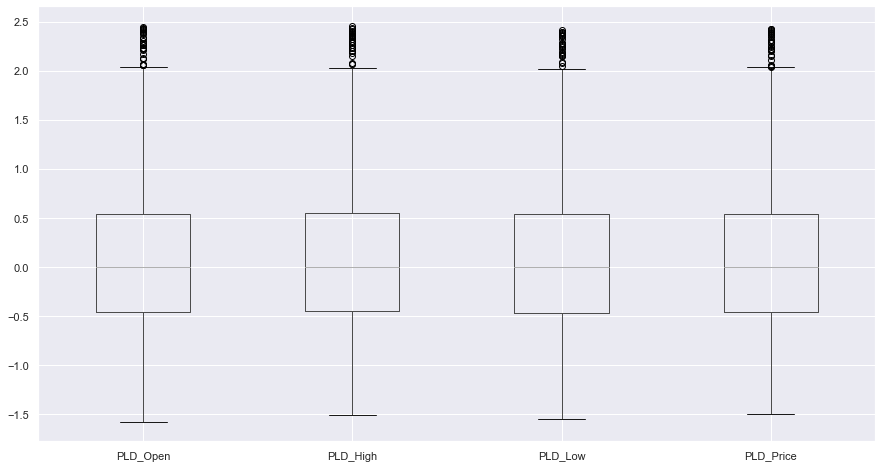

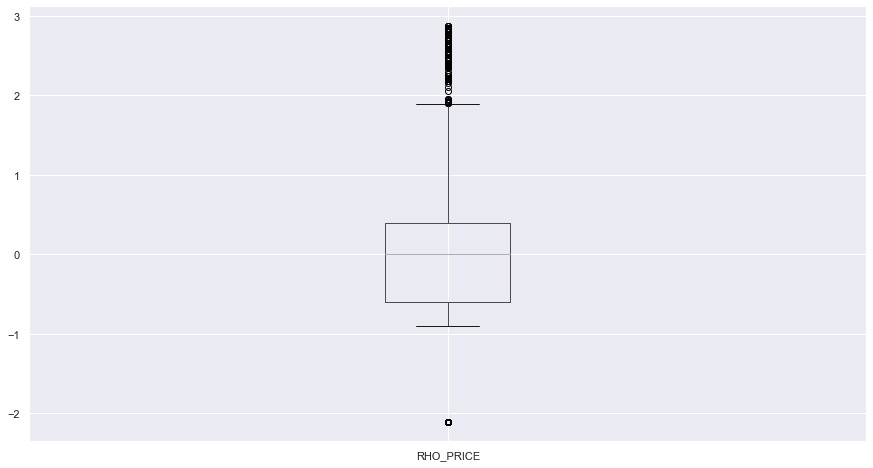

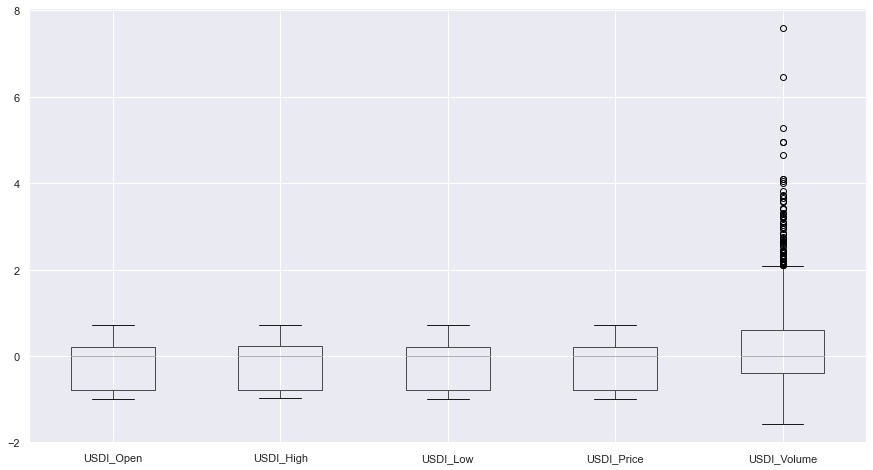

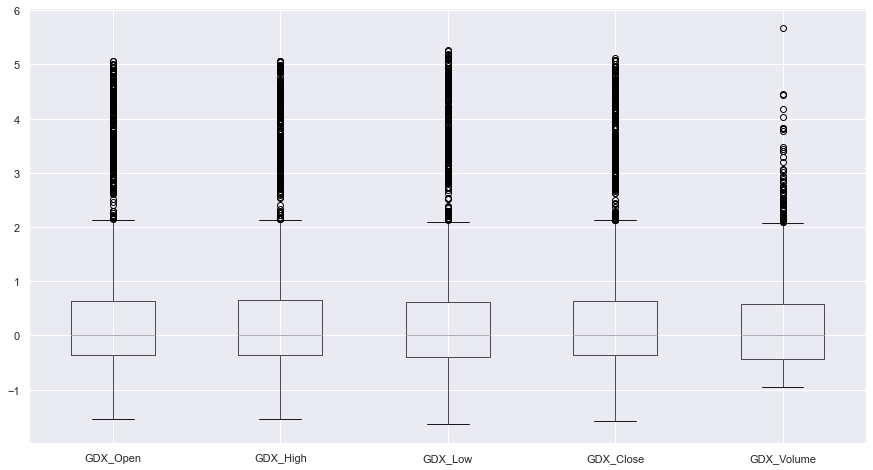

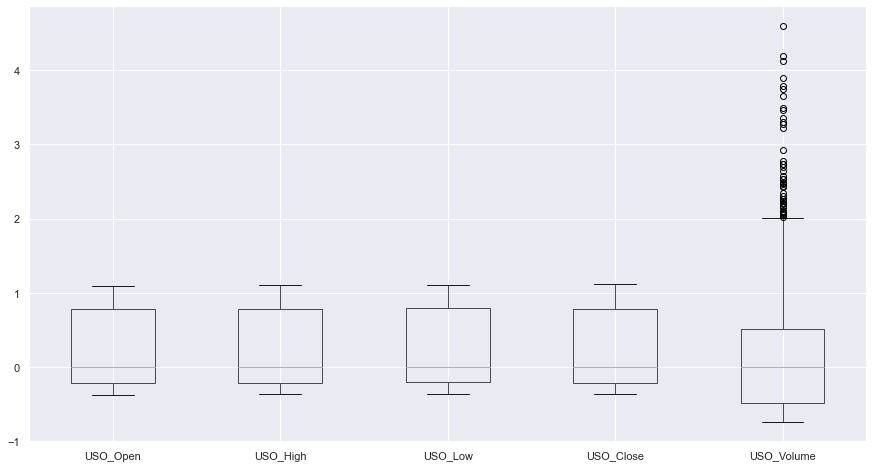

In [136]:
for indicator in ['SP_','DJ_','EG_','EU_','OF_','OS_','SF_','USB_','PLT_','PLD_','RHO_','USDI_','GDX_','USO_']:
    fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=1)
    sns.set(style='darkgrid')
    liste=[]
    for value in ['open','high','low','close','Ajclose','price','trend','Open','High','Low','Close','ajclose','Price','PRICE','volume','Volume']:
        var = indicator+value
        if var in df.columns.drop('Adj Close'):
            liste.append(var)         
    df_normal[liste].boxplot()    